In [7]:
# 📦 Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
)

sns.set(style="whitegrid")


In [8]:
# 📊 Step 2: Load Uploaded Dataset
from google.colab import files
uploaded = files.upload()  # Upload the CSV file named 'synthetic_ads_dataset.csv'


Saving synthetic_ads_dataset.csv to synthetic_ads_dataset (1).csv


In [9]:
# 📈 Step 3: Read Dataset
df = pd.read_csv("/content/synthetic_ads_dataset.csv")
print("Data shape:", df.shape)
df.head()


Data shape: (5000, 6)


,age,time_on_site,daily_internet_usage,male,country_score,clicked_on_ad
0,-0.493863,-0.102111,1.278346,-0.313172,0.759076,0
1,-0.802059,-3.286043,0.510519,-1.920000,-3.322536,0
2,0.606839,-1.723425,2.139794,-2.692988,-0.650466,0
3,-0.175988,-2.720548,-0.300816,-2.983889,-2.504567,0
4,-0.980139,-2.036988,-0.183458,-0.335936,-2.815430,0


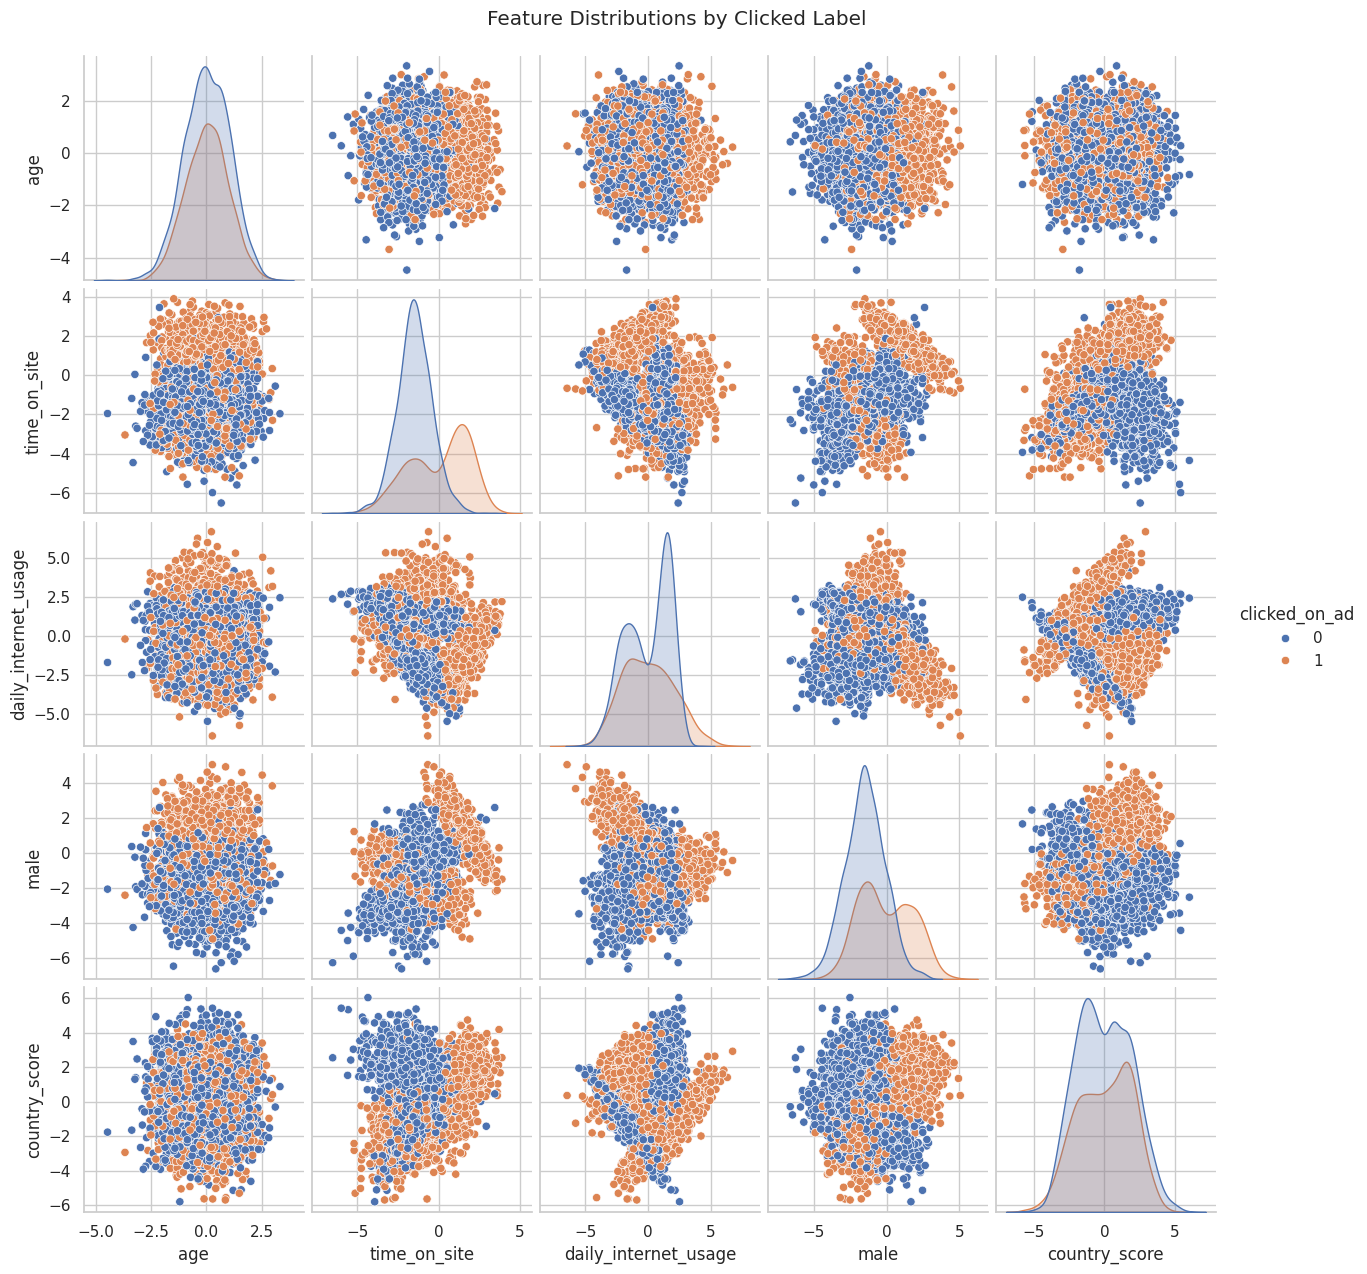

In [10]:
# 🔍 Step 4: EDA (Optional)
sns.pairplot(df, hue="clicked_on_ad")
plt.suptitle("Feature Distributions by Clicked Label", y=1.02)
plt.show()


In [11]:
# 🧠 Step 5: Train/Test Split
X = df.drop("clicked_on_ad", axis=1)
y = df["clicked_on_ad"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
# 🧪 Step 6: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [13]:
# 📋 Step 7: Evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[490 106]
 [115 289]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       596
           1       0.73      0.72      0.72       404

    accuracy                           0.78      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.78      0.78      0.78      1000

Accuracy Score: 0.779
ROC AUC Score: 0.8445287062263275


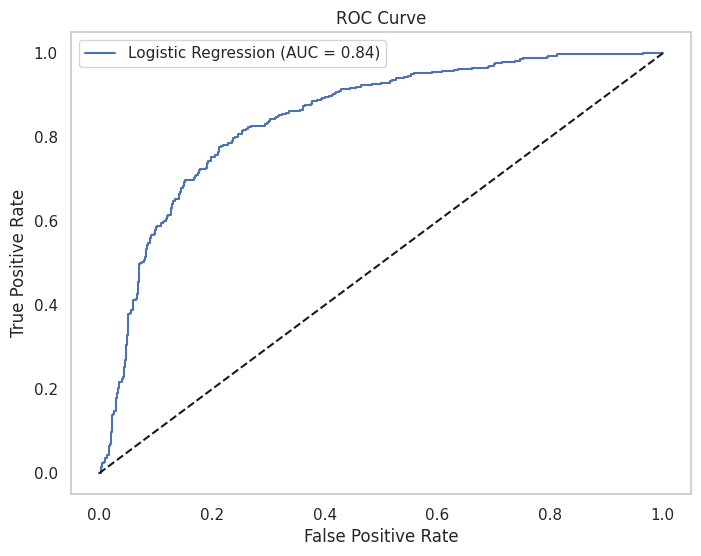

In [14]:
# 📊 Step 8: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
